# Reducción de dimensionalidad del dataset de Churn (Fuga de Clientes) en la Empresa Telefónica

**Informe elaborado por:** Saúl de los Reyes y Lucas Miralles

---

## Resumen Ejecutivo:

El propósito de este informe es proporcionar una estimación detallada sobre el análisis y la reducción de dimensionalidad del dataset que contiene información de los clientes de una empresa telefónica. Se emplearán técnicas como el Análisis de Componentes Principales (PCA) y el Análisis Discriminante Lineal (LDA).

---

## Imports necesarios para el proyecto:

In [321]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.covariance import LedoitWolf as LW
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Semana 1: Aprendiendo PCA
---

Leemos el fichero csv y quitamos las filas con los NaNs, ya que son muy pocos:

In [286]:
df = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')
df.dropna(inplace = True)
df.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in Month 1,Most Loved Competitor network in Month 2,Churn Status
0,ADF0039,1345,44.83,963.0800,0.00,0.00,1.473830e+01,788,2940,1458,4,2G,2G,Weematel,Uxaa,0
1,ADF0040,2713,90.43,5979.4120,48.38,505.00,8.344973e+07,1127,0,58255,2,3G,3G,Uxaa,Uxaa,0
2,ADF0041,746,24.87,114.9000,14.94,13.75,7.115992e+04,15,131,2978,1,3G,3G,PQza,PQza,1
3,ADF0043,1967,65.57,54.1000,8.75,0.00,1.839360e+01,70,696,2274,1,3G,2G,PQza,PQza,1
4,ADF0044,2576,85.87,1222.2204,41.85,131.25,3.537593e+05,98,18635,34804,3,2G,2G,ToCall,Uxaa,1


Quitamos los ids y la clase ya que no son relevantes en el análisis: (Ambos se utilizarán en la visualización de los datos)

In [287]:
ids = df.pop('Customer ID')
clase = df.pop('Churn Status')
df

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in Month 1,Most Loved Competitor network in Month 2
0,1345,44.83,963.0800,0.00,0.00,1.473830e+01,788,2940,1458,4,2G,2G,Weematel,Uxaa
1,2713,90.43,5979.4120,48.38,505.00,8.344973e+07,1127,0,58255,2,3G,3G,Uxaa,Uxaa
2,746,24.87,114.9000,14.94,13.75,7.115992e+04,15,131,2978,1,3G,3G,PQza,PQza
3,1967,65.57,54.1000,8.75,0.00,1.839360e+01,70,696,2274,1,3G,2G,PQza,PQza
4,2576,85.87,1222.2204,41.85,131.25,3.537593e+05,98,18635,34804,3,2G,2G,ToCall,Uxaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,3836,127.87,24438.8300,664.92,8295.00,1.737079e+06,678,72120,337192,10,3G,3G,ToCall,Weematel
1107,105,3.50,75.4000,10.50,10.00,2.401224e+06,22,2532,1522,2,2G,3G,Uxaa,PQza
1108,2172,72.40,16.6420,0.00,8.75,1.312746e+05,5,0,203,2,2G,2G,PQza,PQza
1109,2774,92.47,652.6300,4.14,57.50,2.166006e+06,526,741,716,1,3G,3G,Weematel,Uxaa


Convertimos las variables categóricas a binarias. **Importante:** no usamos drop_first = True pero se podría haber utilizado para evitar correlaciones.

In [288]:
df_dummy = pd.get_dummies(df,dtype = int)

In [289]:
df_dummy.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,1345,44.83,963.0800,0.00,0.00,1.473830e+01,788,2940,1458,4,...,0,0,1,0,0,0,0,1,0,0
1,2713,90.43,5979.4120,48.38,505.00,8.344973e+07,1127,0,58255,2,...,0,1,0,0,0,0,0,1,0,0
2,746,24.87,114.9000,14.94,13.75,7.115992e+04,15,131,2978,1,...,0,0,0,0,0,1,0,0,0,0
3,1967,65.57,54.1000,8.75,0.00,1.839360e+01,70,696,2274,1,...,0,0,0,0,0,1,0,0,0,0
4,2576,85.87,1222.2204,41.85,131.25,3.537593e+05,98,18635,34804,3,...,1,0,0,0,0,0,0,1,0,0


## 1. PCA con estandarización de variables
---

In [290]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_dummy), columns=df_dummy.columns)

In [291]:
df_scaled

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,-0.140276,-0.140356,0.099454,-0.523675,-0.202647,-0.317460,1.942522,-0.269057,-0.395779,0.813071,...,-0.412180,-0.537680,3.059723,-0.347123,-0.3003,-0.549031,-0.226291,0.865561,-0.197888,-0.168391
1,0.932472,0.932394,3.902004,0.302706,1.353480,11.243020,3.068538,-0.531686,1.130686,0.009600,...,-0.412180,1.859843,-0.326827,-0.347123,-0.3003,-0.549031,-0.226291,0.865561,-0.197888,-0.168391
2,-0.609995,-0.609920,-0.543495,-0.268484,-0.160277,-0.307604,-0.625058,-0.519984,-0.354927,-0.392135,...,-0.412180,-0.537680,-0.326827,-0.347123,-0.3003,1.821390,-0.226291,-1.155320,-0.197888,-0.168391
3,0.347479,0.347557,-0.589584,-0.374216,-0.202647,-0.317460,-0.442371,-0.469513,-0.373848,-0.392135,...,-0.412180,-0.537680,-0.326827,-0.347123,-0.3003,1.821390,-0.226291,-1.155320,-0.197888,-0.168391
4,0.825040,0.825119,0.295891,0.191167,0.201792,-0.268455,-0.349367,1.132975,0.500422,0.411336,...,2.426124,-0.537680,-0.326827,-0.347123,-0.3003,-0.549031,-0.226291,0.865561,-0.197888,-0.168391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,1.813097,1.813179,17.894868,10.833859,25.357879,-0.076821,1.577149,5.910783,8.627338,3.223483,...,2.426124,-0.537680,-0.326827,-0.347123,-0.3003,-0.549031,-0.226291,-1.155320,5.053374,-0.168391
1084,-1.112650,-1.112654,-0.573438,-0.344324,-0.171832,0.015185,-0.601807,-0.305503,-0.394059,0.009600,...,-0.412180,1.859843,-0.326827,-0.347123,-0.3003,1.821390,-0.226291,-1.155320,-0.197888,-0.168391
1085,0.508234,0.508234,-0.617978,-0.523675,-0.175684,-0.299276,-0.658274,-0.531686,-0.429508,0.009600,...,-0.412180,-0.537680,-0.326827,-0.347123,-0.3003,1.821390,-0.226291,-1.155320,-0.197888,-0.168391
1086,0.980306,0.980386,-0.135878,-0.452960,-0.025464,-0.017400,1.072269,-0.465493,-0.415720,-0.392135,...,-0.412180,-0.537680,3.059723,-0.347123,-0.3003,-0.549031,-0.226291,0.865561,-0.197888,-0.168391


In [292]:
# Crear un objeto PCA con el máximo número de componentes:
pca = PCA(n_components=len(df_scaled.columns))

# Ajustar el modelo PCA al conjunto de datos estandarizado
pca.fit(df_scaled)

# Transformar el conjunto de datos original utilizando las componentes principales
X_pca = pca.transform(df_scaled)

# Mostrar las primeras filas del conjunto de datos transformado
X = pd.DataFrame(X_pca, columns=df_dummy.columns)

X.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,-0.329693,3.093200,-1.169438,-0.003054,-0.521622,-0.080030,0.545149,-0.094701,-1.224705,2.763028,...,0.200102,0.448075,-0.991167,-0.016389,0.000071,4.200600e-16,-2.197741e-16,1.007885e-16,-3.992648e-16,2.744953e-16
1,5.457679,-0.693706,0.782714,-0.006043,-0.656691,1.525404,0.733076,0.945855,0.723673,-3.800115,...,1.857451,0.224799,-1.040383,0.699651,0.000060,1.571916e-15,1.390049e-15,6.003889e-16,-2.342155e-15,2.508819e-15
2,-0.673062,-2.487626,-0.592787,1.565436,1.621652,0.592942,-0.241495,-0.239817,-0.548772,0.026141,...,-0.271903,0.101926,0.115123,-0.036557,-0.000052,-3.313651e-17,1.271706e-16,3.922221e-16,1.523773e-16,-4.263330e-16
3,-1.454417,-0.409183,-0.928133,1.053910,2.437834,0.417014,-0.075839,-0.032595,-0.279351,-0.165282,...,-0.068230,2.158237,0.799296,-0.102475,-0.000045,4.109527e-16,6.822821e-16,9.473336e-16,6.797332e-16,-5.373553e-16
4,-0.127137,3.580040,-0.300006,-0.274295,0.188704,0.145482,-1.452295,-0.324676,-0.141562,-0.214587,...,-0.137545,-0.241519,0.786436,0.034408,-0.000055,-3.987295e-16,-4.418187e-16,1.007885e-16,5.583026e-16,-5.857162e-17


Clustermap:

<Figure size 1000x1000 with 0 Axes>

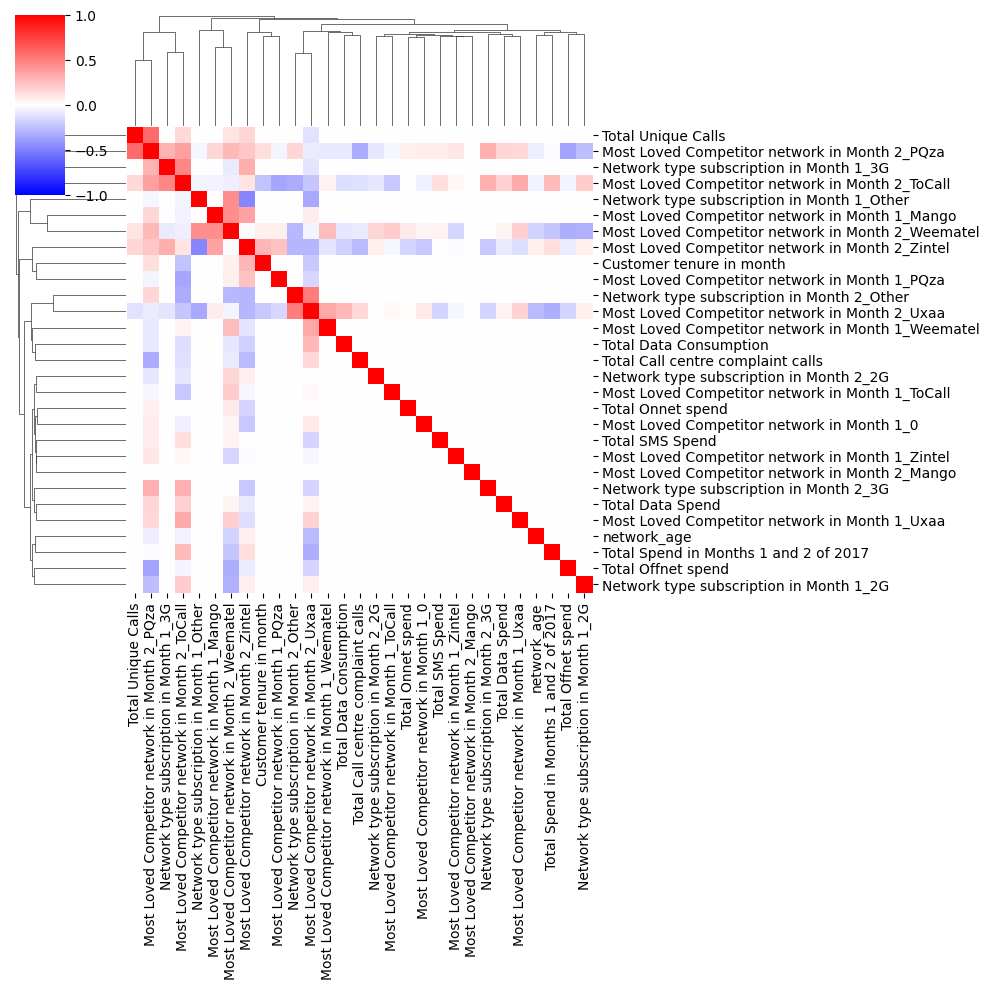

In [293]:
# Calcular las correlaciones entre las componentes principales
plt.figure(figsize=(10,10))
sns.clustermap(X.corr() , cmap = 'bwr', vmin = -1, vmax = 1)
plt.show()

Observando el clustermap, las correlaciones entre las componentes principales no es exactamente 0, esto se debe a la transformación de las variables categóricas a numéricas (codificación one-hot). Si se hubiese realizado un ` drop_first = True` en la conversión, estas correlaciones serían exactamente 0.

**Varianza explicada por cada componente principal:**

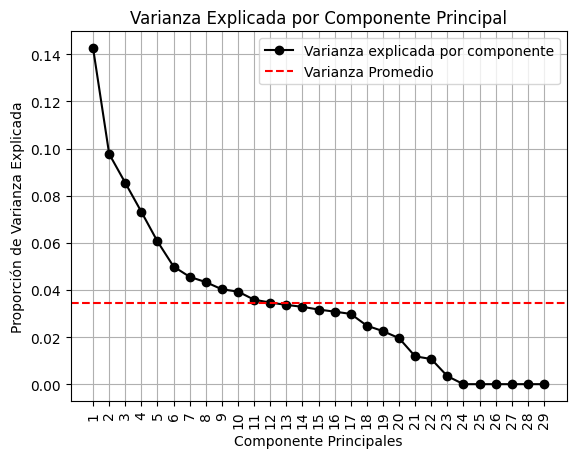

In [294]:
# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Varianza promedio
average_variance = explained_variance.mean()

# Gráfico de puntos con línea

plt.plot(range(1, len(explained_variance) + 1), explained_variance, color='black', marker='o',label='Varianza explicada por componente')
plt.axhline(y=average_variance, color='red', linestyle='--', label='Varianza Promedio')
plt.xlabel('Componente Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.xticks(np.arange(1,30,1), rotation=90)
plt.grid(True)
plt.legend()
plt.show()


**Porcentaje de Varianza Explicada en función del Número de Componentes Principales**

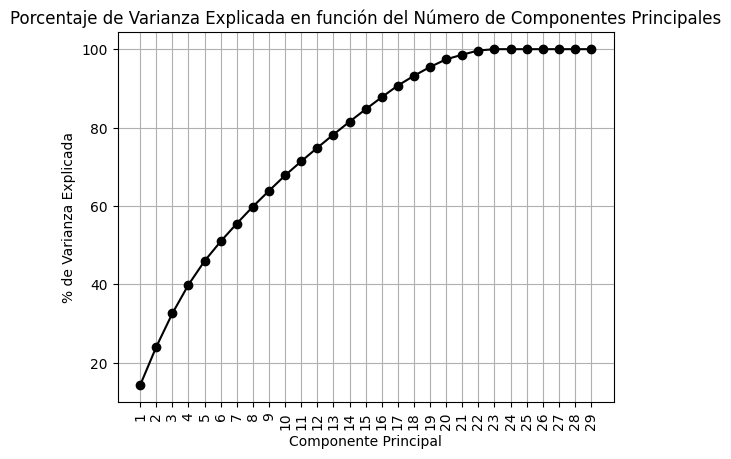

In [295]:
# Varianza acumulativa
cumulative_variance = explained_variance.cumsum()

# Número total de componentes principales
total_components = len(explained_variance)

# Calcular el porcentaje de varianza explicada para cada número de componentes
percentage_variance_explained = [(cumulative_variance[i] / cumulative_variance[-1]) * 100 for i in range(total_components)]

# Gráfico de líneas para el porcentaje de varianza explicada
plt.plot(range(1, total_components + 1), percentage_variance_explained, marker='o', color='black')
plt.xlabel('Componente Principal')
plt.ylabel('% de Varianza Explicada')
plt.title('Porcentaje de Varianza Explicada en función del Número de Componentes Principales')
plt.xticks(np.arange(1,30,1), rotation=90)
plt.grid(True)
plt.show()


**Visualizando el dataset:**

In [296]:
# Crear un DataFrame con las variables originales y las dos primeras componentes principales
df_plot = pd.concat([df, pd.DataFrame(X_pca[:, :2], columns=['Componente_1', 'Componente_2'])], axis=1)

# Eliminamos las filas con nulos en la clase
df_plot.dropna(inplace=True)

# Añadimos los ids en la visualización
df_plot['Customer ID'] = ids

# Hacemos que Churn Status sea categórica (solo toma dos valores)
df_plot['Churn Status'] = clase.astype('category')

# Crear el diccionario auxiliar para mostrar los valroes de las variables originales
aux = {a:True for a in df.columns}
aux['Churn Status'] = True
aux['Customer ID'] = True
aux["Componente_1"] = False
aux["Componente_2"] = False

# Configuración de la paleta de colores y valores de categoría
color_discrete_map = {0: 'cyan', 1: 'yellow'}
category_orders = {'Churn Status': [0, 1]}

# Visualizar el dataset en 2D con colores por la variable a predecir
fig = px.scatter(df_plot, x='Primera Componente Principal', y='Segunda Componente Principal', color='Churn Status', hover_data=aux, width=800, height=800,
                 color_discrete_map=color_discrete_map, category_orders=category_orders,
                 title='Proyección 2D de las 2 primeras CP con colores por la clase a predecir')

# Mostrar la visualización
fig.show()


**Proyecciones de Variables Originales y Datos Originales sobre el Espacio PCA:**

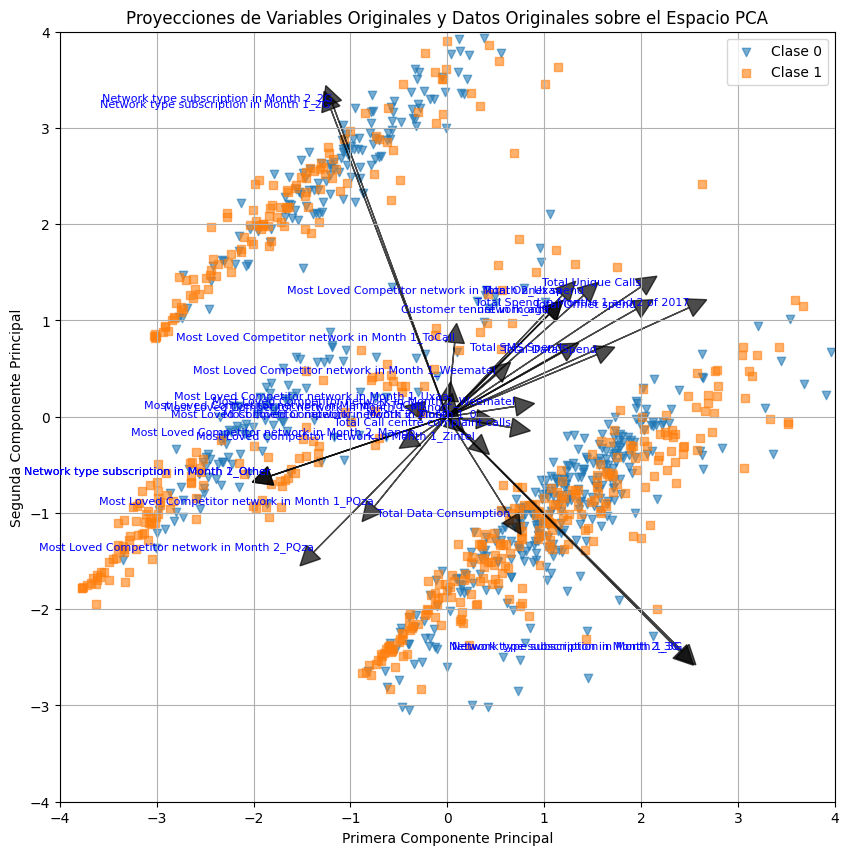

In [297]:
scale_factor = 7
projections = pca.components_

plt.figure(figsize = (10,10))
unique_classes = np.unique(clase)
for c in unique_classes:
    marker = 's' if c == 1 else 'v'  # Cuadrado para clase 1, triángulo para clase 2
    plt.scatter(X_pca[clase == c, 0], X_pca[clase == c, 1], label=f'Clase {c}', marker=marker,alpha = 0.6)

# Configuración  del gráfico
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Proyecciones de Variables Originales y Datos Originales sobre el Espacio PCA')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)

for i in range(len(projections[0])):
    scaled_projection = scale_factor * projections[:, i]
    # Dibujar los vectores
    plt.arrow(0, 0, scaled_projection[0], scaled_projection[1], color='black', alpha=0.7, head_width=0.2, head_length=0.2)
    # Poner texto sobre cada vector
    plt.text(scaled_projection[0], scaled_projection[1], X.columns[i], color='blue', fontsize=8, ha='right', va='bottom')

plt.show()

Se observa la formación de tres grandes grupos de variables, sin embargo, se nota que en estos grupos la clase con valores 0 y 1 se encuentra mezclada. Para mejorar esta clasificación y lograr una representación más completa de la varianza en los datos, se recomienda la visualización en al menos tres componentes principales. Esto se justifica debido a que las dos primeras componentes apenas explican el 25% de la varianza total.

## 2. PCA sin estandarizar las variables:
---

In [298]:
# Crear un objeto PCA con el mismo número de componentes que variables originales
pca_no_scaled = PCA(n_components=len(df_dummy.columns))

# Ajustar el modelo PCA al conjunto de datos estandarizado
pca_no_scaled.fit(df_dummy)

# Transformar el conjunto de datos original utilizando las componentes principales
X_pca_no_scaled = pca_no_scaled.transform(df_dummy)

# Mostrar las primeras filas del conjunto de datos transformado
X_no_scaled = pd.DataFrame(X_pca_no_scaled, columns=df_dummy.columns)

X_no_scaled.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_Mango,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,-2.291597e+06,-14849.738413,-1412.759854,-35.619725,635.069018,-599.786906,-227.180855,-6.129104,1.858853,1.307401,...,0.020838,-0.016237,-0.043746,-0.004803,0.004258,-1.987952e-14,-7.596682e-17,-1.675735e-16,2.513957e-16,1.144739e-16
1,8.115813e+07,36750.214108,-2423.732103,2450.241172,1805.912788,-706.031261,144.189765,16.008104,-1.527599,1.851528,...,-0.094534,-0.103931,-0.055831,-0.126577,0.003600,-3.853236e-11,-1.332127e-16,-7.226850e-16,3.624180e-16,-1.630818e-16
2,-2.220452e+06,-13717.236313,-4395.374399,-806.421042,-89.113808,93.100771,-6.890958,-7.425573,-0.723103,-0.930682,...,-0.057345,-0.026013,-0.011267,-0.011731,-0.003153,-1.019972e-11,9.034633e-18,-2.439013e-16,4.322887e-17,1.005961e-16
3,-2.291593e+06,-14340.551872,-3758.556552,392.048746,-346.954673,94.965947,-30.798100,-6.694870,-0.876147,0.065412,...,-0.075814,0.011323,0.012375,0.004335,-0.002724,2.023260e-11,-1.228044e-16,-1.467568e-16,1.264956e-16,2.116184e-16
4,-1.937852e+06,20146.357828,10091.110075,920.558725,-438.346734,224.014092,87.037002,-11.145710,0.797844,1.260968,...,-0.191473,0.038800,-0.020713,-0.014898,-0.003327,1.174566e-11,-8.290571e-17,3.597824e-16,-4.008603e-16,-3.818175e-17


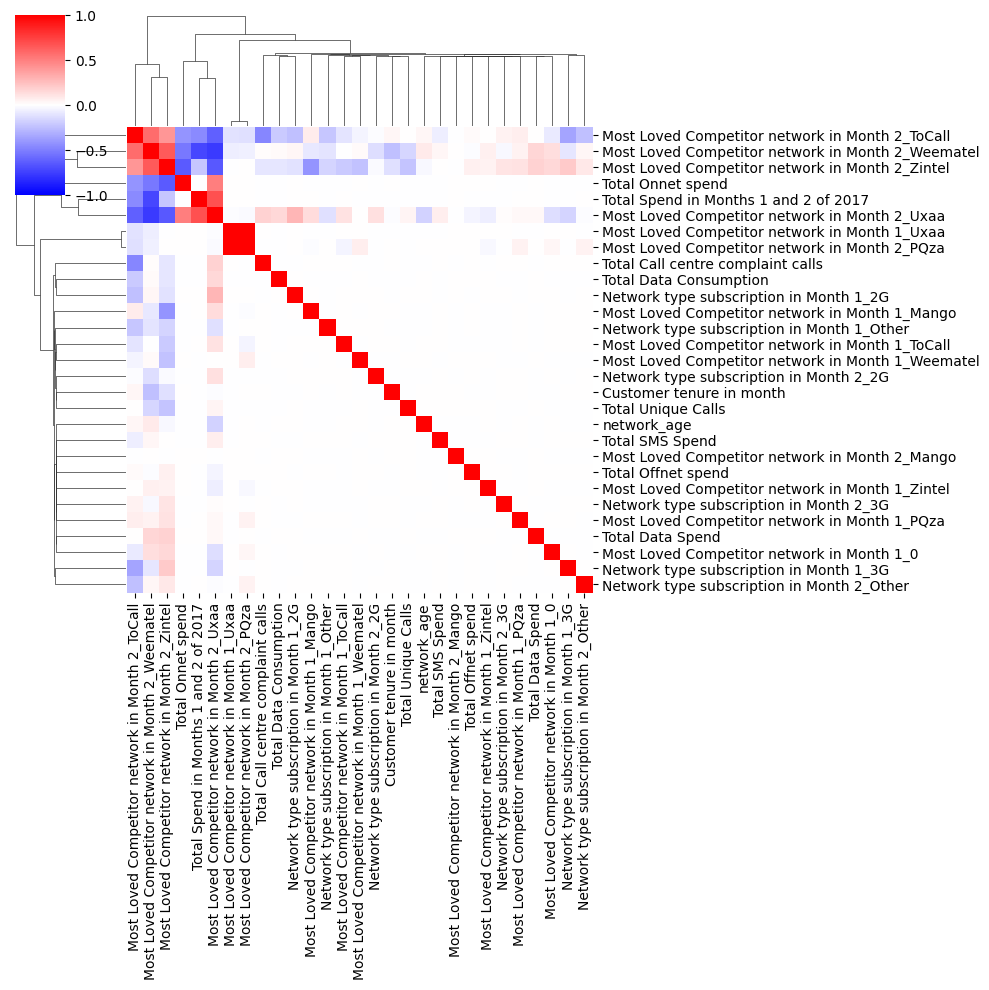

In [299]:
plt.figure(figsize=(10,10))
sns.clustermap(X_no_scaled.corr() , cmap = 'bwr', vmin = -1, vmax = 1)
plt.show()

En las correlaciones sucede lo mismo que en el caso anterior, solo existe en las variables codificadas.

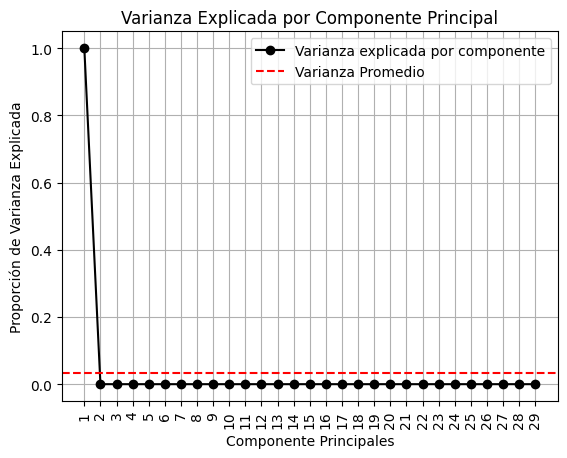

In [300]:
# Varianza explicada por cada componente principal
explained_variance = pca_no_scaled.explained_variance_ratio_

# Varianza promedio
average_variance = explained_variance.mean()

# Gráfico de puntos con línea

plt.plot(range(1, len(explained_variance) + 1), explained_variance, color='black', marker='o',label='Varianza explicada por componente')
plt.axhline(y=average_variance, color='red', linestyle='--', label='Varianza Promedio')
plt.xlabel('Componente Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.xticks(np.arange(1,30,1), rotation=90)
plt.grid(True)
plt.legend()
plt.show()


Vemos como una sola componente explica todo el modelo, lo cual no tiene ningún sentido.

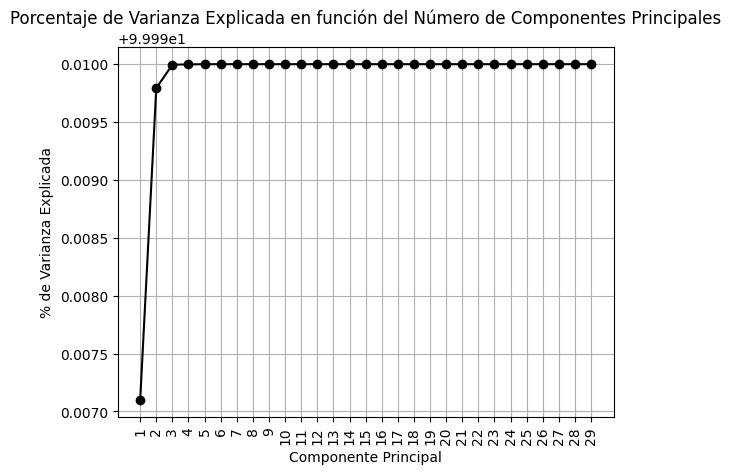

In [301]:
# Varianza acumulativa
cumulative_variance = explained_variance.cumsum()

# Número total de componentes principales
total_components = len(explained_variance)

# Calcular el porcentaje de varianza explicada para cada número de componentes
percentage_variance_explained = [(cumulative_variance[i] / cumulative_variance[-1]) * 100 for i in range(total_components)]

# Gráfico de líneas para el porcentaje de varianza explicada
plt.plot(range(1, total_components + 1), percentage_variance_explained, marker='o', color='black')
plt.xlabel('Componente Principal')
plt.ylabel('% de Varianza Explicada')
plt.xticks(np.arange(1,30,1), rotation=90)
plt.grid(True)
plt.title('Porcentaje de Varianza Explicada en función del Número de Componentes Principales')
plt.show()


Lo mismo sucede con el porcentaje de la varianza explicada, solo la primera explica casi todo y con la segunda ya es prácticamente el 100%. Esto no es lógico pero se debe a no estandarizar las variables.

In [302]:
# Crear un DataFrame con las variables originales y las dos primeras componentes principales
df_plot = pd.concat([df, pd.DataFrame(X_pca_no_scaled[:, :2], columns=['Componente_1', 'Componente_2'])], axis=1)

# Eliminamos las filas con nulos en la clase
df_plot.dropna(inplace=True)

# Añadimos los ids en la visualización
df_plot['Customer ID'] = ids

# Hacemos que Churn Status sea categórica (solo toma dos valores)
df_plot['Churn Status'] = clase.astype('category')

# Crear el diccionario auxiliar para mostrar los valroes de las variables originales
aux = {a:True for a in df.columns}
aux['Churn Status'] = True
aux['Customer ID'] = True
aux["Componente_1"] = False
aux["Componente_2"] = False


# Configuración de la paleta de colores y valores de categoría
color_discrete_map = {0: 'cyan', 1: 'yellow'}  # Asigna colores específicos a 0 y 1
category_orders = {'Churn Status': [0, 1]}  # Orden de las categorías

# Visualizar el dataset en 2D con colores por la variable a predecir
fig = px.scatter(df_plot, x='Primera Componente Principal', y='Segunda Componente Principal', color='Churn Status', hover_data=aux, width=800, height=800,
                 color_discrete_map=color_discrete_map, category_orders=category_orders,
                 title='Proyección 2D de las 2 primeras CP con colores por la clase a predecir')

# Mostrar la visualización
fig.show()

Como no hemos estandarizado, los valores más extremos (casi 100M en la primera componente) hacen que el resto de datos se acumulen y no haya una clasificación diferenciada por grupos como nos gustaría que sucediese.

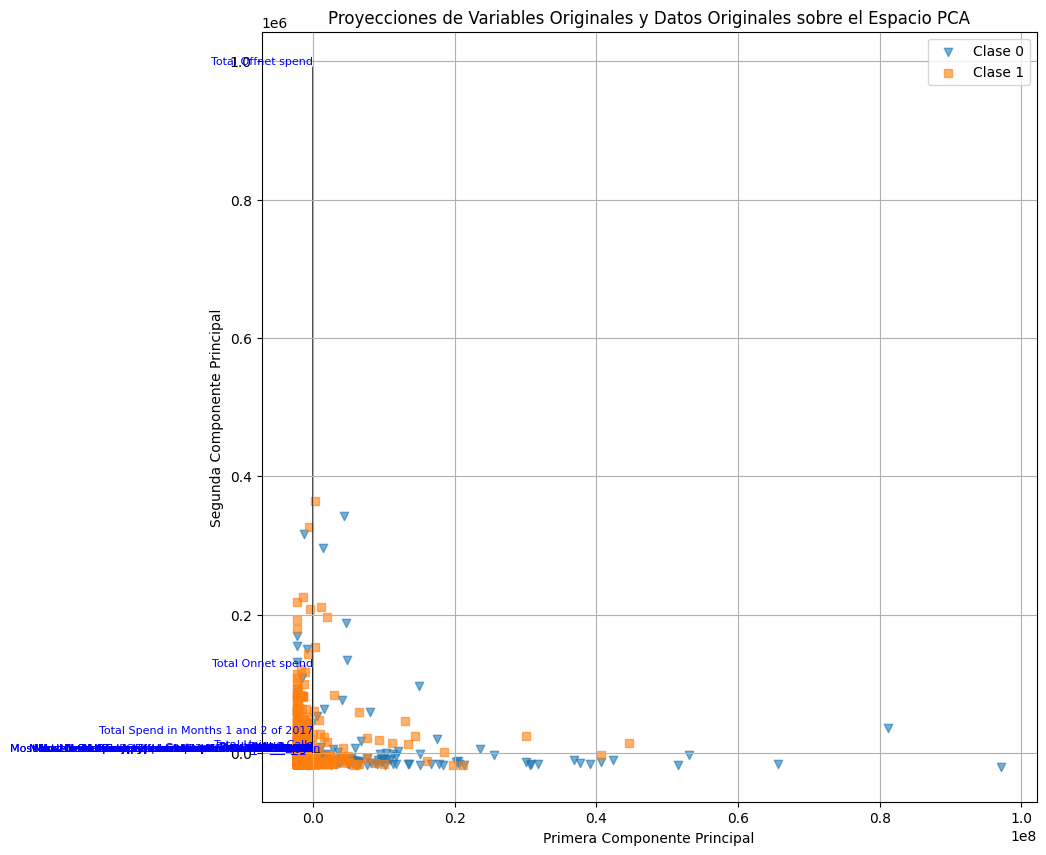

In [303]:
scale_factor = 1000000
projections = pca_no_scaled.components_

plt.figure(figsize = (10,10))
unique_classes = np.unique(clase)
for c in unique_classes:
    marker = 's' if c == 1 else 'v'
    plt.scatter(X_pca_no_scaled[clase == c, 0], X_pca_no_scaled[clase == c, 1], label=f'Clase {c}', marker=marker,alpha = 0.6)

# 4. Configura el gráfico
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('Proyecciones de Variables Originales y Datos Originales sobre el Espacio PCA')
plt.legend()
plt.grid(True)

for i in range(len(projections[0])):
    scaled_projection = scale_factor * projections[:, i]
    plt.arrow(0, 0, scaled_projection[0], scaled_projection[1], color='black', alpha=0.7, head_width=0.2, head_length=0.2)
    plt.text(scaled_projection[0], scaled_projection[1], X.columns[i], color='blue', fontsize=8, ha='right', va='bottom')

# 5. Muestra el gráfico
plt.show()

Vemos que sin estandarizar, los direcciones que explican la máxima varianza son muy pequeñas, excepto en un caso, la primera componente principal. Esto concuerda con lo visto en los gráficos de la varianza y % de varianza acumulativa explicada por las componentes.

### Conclusiones finales extraídas de la estandarización:
---

El efecto de realizar el análisis de componentes principales (PCA) sin estandarizar las variables es que la escala de las variables tiene un impacto directo en la contribución de cada variable a las componentes principales. Cuando las variables tienen diferentes escalas, las variables con magnitudes más grandes pueden dominar la variabilidad total y tener un impacto desproporcionadamente grande en las primeras componentes principales.

Al no estandarizar, las variables con magnitudes más grandes pueden influir más en la dirección y la magnitud de los autovectores, que representan las direcciones de máxima variabilidad en los datos. Además, la varianza de cada variable afectará la varianza explicada por cada componente principal.

Estandarizar las variables implica restar la media y dividir por la desviación estándar, lo que coloca todas las variables en la misma escala. Esto es importante en PCA porque asegura que cada variable contribuya de manera equitativa a la variabilidad total y que la dirección y magnitud de las componentes principales no estén influenciadas por la escala original de las variables.

En resumen, al no estandarizar, las variables con magnitudes más grandes pueden sesgar el análisis PCA, dando una mayor importancia a esas variables. Estandarizar ayuda a obtener resultados más equitativos y representativos en términos de la contribución de cada variable a las componentes principales.

## Semana 2: Aprendiendo LDA
---

Para escoger el numero de componentes en LDA debe cumplir que:

`n_components: int, float, None or str, optional (default=None)
Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.`

In [304]:
X = df_scaled
y = clase
# Condición:
n_classes = len(clase.unique())
n_features = len(X.columns)
n_components = min(n_classes - 1, n_features)
print(n_components)

1


n_components será siempre 1 como máximo, ya que nuestra clase Churn Status sólo toma dos valores 0-1.

In [305]:
lda = LDA(store_covariance=True)
X_lda = lda.fit(X, y).transform(X)

**Parámetros principales obtenidos:**

In [306]:
# Matriz de covarianza
covariance_matrix = lda.covariance_

# Ratio de varianza explicada
explained_variance_ratio = lda.explained_variance_ratio_

# Coeficientes e intercept
coeficientes = lda.scalings_
intercepto = lda.intercept_

In [307]:
print("Matriz de Covarianza:")
pd.DataFrame(covariance_matrix)

Matriz de Covarianza:


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.979151,0.979152,0.129252,-0.012795,0.054420,-0.087921,0.205327,0.020482,0.095945,0.044177,...,0.020417,-0.026812,0.065302,-0.021295,-0.057058,-0.096416,-0.033637,0.137959,0.015726,-0.046590
1,0.979152,0.979152,0.129253,-0.012795,0.054422,-0.087920,0.205329,0.020481,0.095948,0.044177,...,0.020416,-0.026813,0.065306,-0.021295,-0.057060,-0.096415,-0.033636,0.137959,0.015727,-0.046591
2,0.129252,0.129253,0.999604,0.461747,0.704218,0.133633,0.563723,0.419155,0.734414,0.086016,...,0.059764,-0.030432,0.051726,0.035201,-0.022508,-0.213436,-0.012822,0.122129,0.192983,0.011104
3,-0.012795,-0.012795,0.461747,0.976088,0.401526,-0.014513,0.127263,0.312447,0.320584,0.034907,...,0.022481,0.004992,0.013070,-0.016000,-0.035501,-0.061350,-0.015108,0.022000,0.144519,0.003089
4,0.054420,0.054422,0.704218,0.401526,0.997740,0.097574,0.133691,0.248603,0.325468,0.078679,...,0.042652,-0.034982,0.023623,0.006245,-0.025740,-0.067353,-0.024522,0.029842,0.143935,-0.008512
5,-0.087921,-0.087920,0.133633,-0.014513,0.097574,0.983435,-0.005115,-0.067989,0.028022,0.023249,...,-0.052655,0.008371,-0.035255,-0.000596,-0.014709,0.007026,0.010334,-0.034872,0.017459,0.078136
6,0.205327,0.205329,0.563723,0.127263,0.133691,-0.005115,0.980841,0.281691,0.564527,0.055120,...,0.080340,-0.060728,0.081611,0.023570,-0.067953,-0.256847,-0.043501,0.266282,0.051321,-0.031150
7,0.020482,0.020481,0.419155,0.312447,0.248603,-0.067989,0.281691,0.998860,0.382787,0.068650,...,0.077972,0.011085,0.042847,-0.026791,-0.031257,-0.205926,0.012330,0.177705,0.039058,-0.015532
8,0.095945,0.095948,0.734414,0.320584,0.325468,0.028022,0.564527,0.382787,0.986096,0.050370,...,0.049525,-0.029007,0.059785,0.012266,0.073362,-0.199613,0.060766,0.016666,0.196070,0.032587
9,0.044177,0.044177,0.086016,0.034907,0.078679,0.023249,0.055120,0.068650,0.050370,0.995832,...,-0.046502,0.030273,0.083719,0.008311,-0.028955,-0.015219,-0.071121,0.072680,-0.002743,-0.035027


In [308]:
print("Ratio de Varianza Explicada:")
explained_variance_ratio

Ratio de Varianza Explicada:


array([1.])

In [309]:
print("Coeficientes:")
pd.DataFrame(coeficientes)

Coeficientes:


,0
0,-0.093600
1,-0.093587
2,-0.515661
3,0.301803
4,0.244338
5,-0.295327
6,-0.165551
7,-0.072838
8,0.613416
9,-0.066876


In [310]:
print("Intercept:")
print(intercepto)

Intercept:
[-0.07500356]


**Gráfica separación de clases con LDA:**

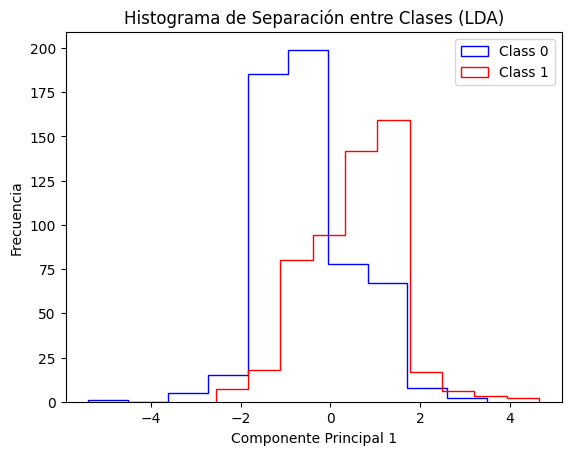

In [311]:
if len(y.unique()) == 2:
    class_0 = X_lda[y == 0, 0]
    class_1 = X_lda[y == 1, 0]

    plt.hist(class_0, color='b', histtype='step', label='Class 0')
    plt.hist(class_1, color='r', histtype='step', label='Class 1')
    plt.legend()
    plt.title('Histograma de Separación entre Clases (LDA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    # Si hay más de dos clases
    colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    plt.figure()

    for i, color in zip(y.unique(), colors):
        plt.scatter(
            X_lda[y == i, 0],
            X_lda[y == i, 1],
            alpha=0.8,
            color=color,
            label=f'Class {i}'
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("LDA del Dataset de Fuga de Clientes")
    plt.show()

**Gráfica separación de clases con PCA:**

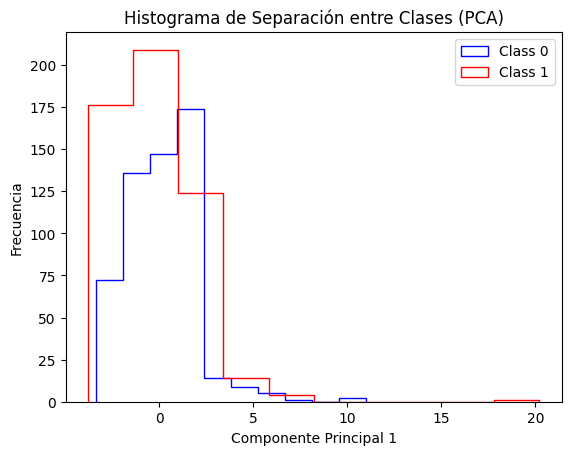

In [312]:
# Si solo hay dos clases
if len(y.unique()) == 2:
    class_0 = X_pca[y == 0, 0]
    class_1 = X_pca[y == 1, 0]

    plt.hist(class_0, color='b', histtype='step', label='Class 0')
    plt.hist(class_1, color='r', histtype='step', label='Class 1')
    plt.legend()
    plt.title('Histograma de Separación entre Clases (PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    # Si hay más de dos clases
    colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    plt.figure()

    for i, color in zip(y.unique(), colors):
        plt.scatter(
            X_pca[y == i, 0],
            X_pca[y == i, 1],
            alpha=0.8,
            color=color,
            label=f'Class {i}'
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("PCA del Dataset de Fuga de Clientes")
    plt.show()

### Comparativa de ambas gráficas:
---
- En el análisis comparativo entre LDA y PCA, dos métodos de reducción de dimensionalidad, se observa una diferencia significativa en la separación entre clases.

- **Solapamiento y Outliers:**
  - En la gráfica de LDA, se evidencia un menor solapamiento entre ambos histogramas en comparación con la gráfica de PCA.
  - Además, es notable que la visualización de LDA no muestra los outliers extremos presentes en los histogramas de PCA.

- **Conclusión:**
  - En base a estos hallazgos, se puede concluir que LDA logra una mejor separación entre las clases.
  - Este rendimiento mejorado de LDA puede atribuirse a su naturaleza supervisada y a la capacidad de utilizar información de las clases durante la reducción de dimensionalidad. Además, la ausencia de outliers extremos en la visualización de LDA sugiere una mayor robustez del método en presencia de datos atípicos.

### Repetir LDA utilizando un mayor número de componentes
---

In [313]:
print(X.shape[1])

29


In [ ]:
lda = LDA(n_components=X.shape[1], store_covariance=True)
X_lda = lda.fit_transform(X, y)

**Conclusión:** Vemos que no se puede realizar cogiendo un n_components = X.shape[1]. Esto cogería todas las características de nuestro dataframe y no cumpliría con la restricción mencionada anteriormente.

### Repetir LDA utilizando el solver eigen
---

**Problema:**
Si no utilizamos shrinkage (regularización), los menores de la matriz de covarianza pueden ser definidos no positivos, lo que resultará en un error al calcular los autovectores/autovalores. No obstante, al poner este parámetro en automático, podemos aplicar LDA sin problemas.

**Parámetros shrinkage y covariance_estimator:**

- *shrinkage* (regularización), predetermindo = None: Es la eegularización aplicada a la matriz de covarianza. Sino es None se puede poner en 'auto' o en un número entre 0 y 1.
- *covariance_estimator* (estimador de covarianza), predeterminado=None: Si no es None, covariance_estimator se utiliza para estimar las matrices de covarianza en lugar de depender del estimador de covarianza empírico (con posible reducción). El objeto debe tener un método fit y un atributo covariance_, similar a los estimadores en sklearn.covariance. Si es None, el parámetro de reducción impulsa la estimación. Esto debería dejarse en None si se utiliza la reducción. Se debe tener en cuenta que covariance_estimator solo funciona con los solucionadores 'lsqr' y 'eigen'.

**Importante:** sólo se puede utilizar uno de los dos parámetros a la vez.

### Configurando los parámetros:

##### Usando shrinkage = 'auto'

In [315]:
lda_eigen = LDA(solver='eigen', shrinkage='auto')
X_lda_eigen = lda_eigen.fit_transform(X, y)

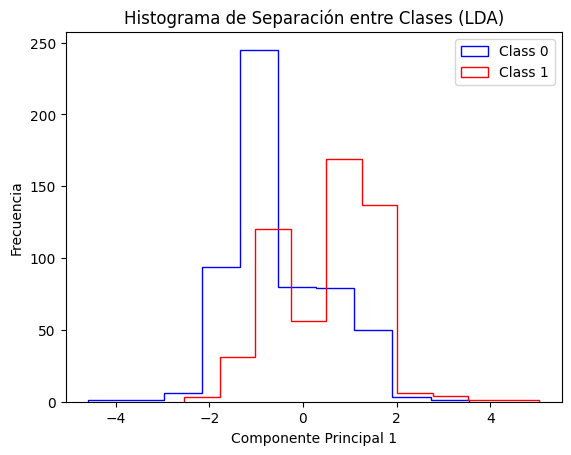

In [316]:
if len(y.unique()) == 2:
    class_0 = X_lda_eigen[y == 0, 0]
    class_1 = X_lda_eigen[y == 1, 0]

    plt.hist(class_0, color='b', histtype='step', label='Class 0')
    plt.hist(class_1, color='r', histtype='step', label='Class 1')
    plt.legend()
    plt.title('Histograma de Separación entre Clases (LDA) con shrinkage auto')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    # Si hay más de dos clases
    colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    plt.figure()

    for i, color in zip(y.unique(), colors):
        plt.scatter(
            X_lda_eigen[y == i, 0],
            X_lda_eigen[y == i, 1],
            alpha=0.8,
            color=color,
            label=f'Class {i}'
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("LDA del Dataset de Fuga de Clientes")
    plt.show()

##### Usando covariance_estimator = LedoitWolf

In [322]:
lda = LDA(solver='eigen', covariance_estimator=LW())
X_lda = lda.fit_transform(X, y)

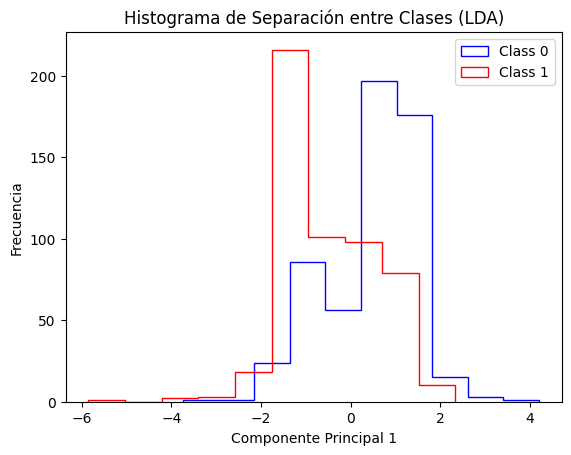

In [323]:
if len(y.unique()) == 2:
    class_0 = X_lda[y == 0, 0]
    class_1 = X_lda[y == 1, 0]

    plt.hist(class_0, color='b', histtype='step', label='Class 0')
    plt.hist(class_1, color='r', histtype='step', label='Class 1')
    plt.legend()
    plt.title('Histograma de Separación entre Clases (LDA) con LedoitWolf')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    # Si hay más de dos clases
    colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    plt.figure()

    for i, color in zip(y.unique(), colors):
        plt.scatter(
            X_lda[y == i, 0],
            X_lda[y == i, 1],
            alpha=0.8,
            color=color,
            label=f'Class {i}'
        )

    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("LDA del Dataset de Fuga de Clientes")
    plt.show()

### Conclusiones de usar el solver eigen:
---

Tras realizar un exhaustivo análisis, se evidencia una mejora sútil al emplear este solver en el contexto de Análisis Discriminante Lineal (LDA). Ya sea con regularización automática o al utilizar otro estimador de la covarianza (como LedoitWolf), la distribución del histograma de separación es un poco mejor que el original, indicando que el rendimiento de LDA con el solver eigen puede ser mejor en ciertos escenarios donde se escojan de manera adecuada los parámetros del mismo.